In [284]:
def NRZ(_list):
    position_x = []
    values = []
    detected = False
    for i in range(len(_list)):
        if i < len(_list)-1:
            if _list[i] != _list[i+1] :
                values.append(_list[i])
                detected = True
                position_x.append(i)      

        if (detected):
            position_x.append(i+1)
            detected= False
        elif(not detected):
            position_x.append(i)
        values.append(l[i])

    position_x += [position_x[-1]+1]
    values += [_list[-1]]
    return [position_x, values]

In [285]:
def NRZ_L(_list):    
    values, x = NRZ(_list)    
    x = np.asarray(x)
    x *= -1
    x = list(x)    
    return [values,x]

In [286]:
def plot_digital_signal(position_x,values,name):
    #plt.subplots(figsize=(11,11))
    plt.plot(position_x,values)
    plt.title(name)
    plt.grid(axis='both')
    plt.ylim(-1.5, 1.5)
    plt.xlim(0, 10)
    plt.show()

In [287]:
def NRZ_I(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        if _list[i] == 0:
            if actual == 0:
                position_x.append(i)
                values.append(actual)
            position_x.append(i+1)
            values.append(actual)
        elif(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            if actual == 1:
                actual = -1
                
            elif actual == -1:
                actual = 1                
            else:
                actual = 1
        
                
        position_x.append(i)
        position_x.append(i+1)
        values.append(actual)
        values.append(actual)
        
    return [position_x, values]

In [288]:
def NRZ_I_2(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        
        if(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            if actual == 1:
                actual = -1
                
            elif actual == -1:
                actual = 1                
            else:
                actual = 1
        
                
        position_x.append(i)
        position_x.append(i+1)
        values.append(actual)
        values.append(actual)
        
    return [position_x, values]

In [289]:
def Bipolar_AMI(_list):
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    actual = _list[0]
    for i in positions_in_bits:
        if _list[i] == 0:
            if actual == 0:
                position_x.append(i)
                values.append(actual)
                position_x.append(i+1)
                values.append(actual)
            elif actual != 0:
                #actual == 0
                position_x.append(i)
                values.append(0)
                position_x.append(i+1)
                values.append(0)

        elif(_list[i] == 1 and i == 0):
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 1):
            if actual == 1:
                actual = -1

            elif actual == -1:
                actual = 1                
            else:
                actual = 1

            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
            
    return [position_x, values]


In [290]:
def Pseudoternary(_list):
    actual = 0
    positions_in_bits = list(range(len(_list)))
    position_x = []
    values = []
    if _list[0] == 0:
        actual = 1 
        
    for i in positions_in_bits:

        if(i == 0 and actual == 1):
            #print (actual)
            #break
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual) 
            #actual = -1
        elif(_list[i] == 0 and actual == 0):
                #if actual == 0:
            actual = 1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 0 and actual == 1):  
            actual = -1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)

        elif(_list[i] == 0 and actual == -1):  
            actual = 1
            position_x.append(i)
            position_x.append(i+1)
            values.append(actual)
            values.append(actual)
        
        elif(_list[i] == 1):
            position_x.append(i)
            position_x.append(i+1)
            values.append(0)
            values.append(0)
    return [position_x, values]

In [291]:
def ASK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values = np.cos(4 * np.pi * position_x - np.pi/2 )
    
    for i in _list:
        #print (i)
        if i == 0:
            values[start:end] = 0
            
        start += num
        end += num
    return [position_x, values]

In [292]:
def FSK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values1 = position_x.copy()
    values = np.cos(4 * np.pi * position_x - np.pi/2)
    values1 = np.cos(2 * np.pi * position_x - np.pi/2)
    
    for i in _list:
        if i == 0:
            #print (start,)
            values[start:end] = values1[start:end]            
            
        start += num
        end += num
    return [position_x, values]

In [293]:
def PSK(_list):
    start = 0
    num = 500
    end = num
    freq = 1/num
    long_list = len(_list)+1
    position_x = np.arange(0.,float(long_list),freq)
    values = position_x.copy()
    values1 = position_x.copy()
    values = np.cos(4 * np.pi * position_x + np.pi/2)
    values1 = np.cos(4 * np.pi * position_x - np.pi/2)
    
    for i in _list:
        if i == 0:
            values[start:end] = values1[start:end]            
            
        start += num
        end += num
    return [position_x, values]

L [0, 0, 1, 0, 0, 0, 0, 1, 0, 0]


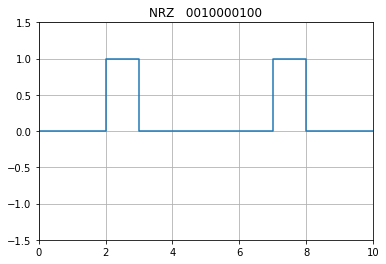

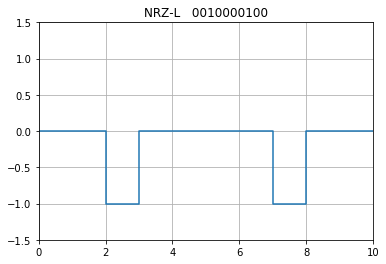

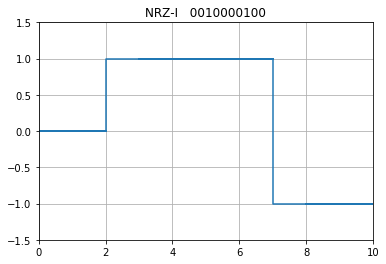

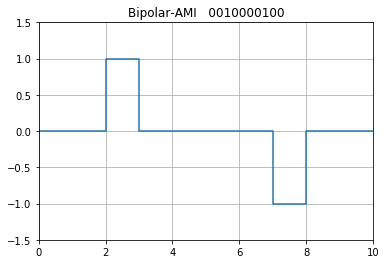

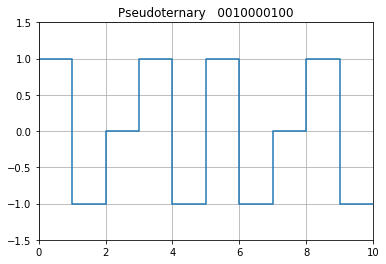

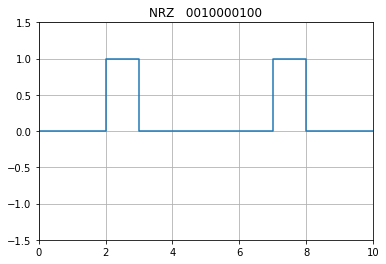

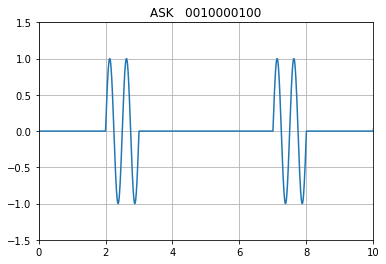

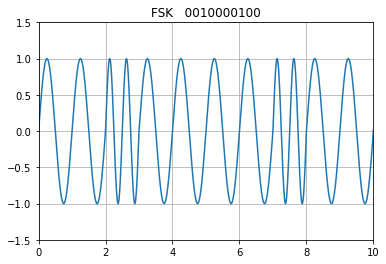

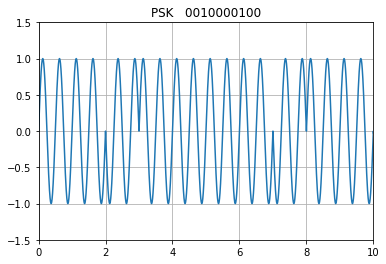

In [294]:
import numpy as np
import matplotlib.pyplot as plt
l = []
sequence = ""
for i in range(10):
    l += [np.random.randint(2)]
    sequence += str(l[i])

print ("L",l)
#Codificacion

position_x, values = NRZ(l)
plot_digital_signal(position_x,values,"NRZ"+"   "+sequence)

position_x, values = NRZ_L(l)
plot_digital_signal(position_x,values,"NRZ-L"+"   "+sequence)

position_x, values = NRZ_I(l)
plot_digital_signal(position_x,values,"NRZ-I"+"   "+sequence)

"""position_x, values = NRZ_I_2(l)
plot_digital_signal(position_x,values,"NRZ-I")"""

position_x, values = Bipolar_AMI(l)
plot_digital_signal(position_x,values,"Bipolar-AMI"+"   "+sequence)

position_x, values = Pseudoternary(l)
plot_digital_signal(position_x,values,"Pseudoternary"+"   "+sequence)

###Decodificacio
#Se ha desfasado la frequencia en -pi/2 para obtener resultados iguales a las transparencias pero que no hace falta
position_x, values = NRZ(l)
plot_digital_signal(position_x,values,"NRZ"+"   "+sequence)

position_x, values = ASK(l)
plot_digital_signal(position_x,values,"ASK"+"   "+sequence)

position_x, values = FSK(l)
plot_digital_signal(position_x,values,"FSK"+"   "+sequence)

position_x, values = PSK(l)
plot_digital_signal(position_x,values,"PSK"+"   "+sequence)

